In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [67]:
methods = ["minMassDist","closeToTrue","minDiagonal","BackToBack"]
SR_thresholds = np.arange(0,50.1,step=0.1)
sig_acceptance_curves = {}
bkg_acceptance_curves = {}
bkg_2d
for method in methods:
    fs = uproot.open("output_ggHH_SM_{0}.root".format(method))['bbbbTree']
    fb = uproot.open("output_allbkg_{0}.root".format(method))['bbbbTree']
    branches = fs.keys()

    dfs = fs.arrays(branches,library="pd")
    dfb = fb.arrays(branches,library="pd")

    # Basic 4b cut
    cut4b_s = (dfs["n_btag"] == 4)
    cut4b_b = (dfb["n_btag"] == 4)

    dfs = dfs[cut4b_s]
    dfb = dfb[cut4b_b]
    n0_sig = len(dfs)
    n0_bkg = len(dfb)
    
    plt.figure(figsize=(20,8))
    sig_mH1 = dfs["H1_m"].values
    sig_mH2 = dfs["H2_m"].values
    plt.figure(figsize=(10,10))
    h12 = plt.hist2d(sig_mH1,sig_mH2,bins=np.arange(0,202,step=2))
    plt.colorbar()
    plt.xlabel(r"$m_{H_1}$ [GeV]",fontsize=16)
    plt.ylabel(r"$m_{H_2}$ [GeV]",fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    max_ind = np.unravel_index(np.argmax(h12[0]),h12[0].shape)
    x = (h12[1][:-1] + h12[1][1:])/2
    y = (h12[2][:-1] + h12[2][1:])/2
    print("Peak is at m_H1 = {0:.4f}, m_H2 = {1:.4f}".format(x[max_ind[0]],y[max_ind[1]]))
    #mH1_0 = x[max_ind[0]]
    #mH2_0 = y[max_ind[1]]
    mH1_0 = np.mean(sig_mH1)
    mH2_0 = np.mean(sig_mH2)
    mH1_RMS = np.std(sig_mH1)
    mH2_RMS = np.std(sig_mH2)
    print("mH1 mean = {0:.4f}, std = {1:.4f}".format(mH1_0,mH1_RMS))
    print("mH2 mean = {0:.4f}, std = {1:.4f}".format(mH2_0,mH2_RMS))
    plt.savefig("HH_candidates/mH1_mH2_grid_nBjet4_{0}.pdf".format(method))
    plt.close()
    

    sig_acceptance = []
    bkg_acceptance = []
    for r in SR_thresholds:
        cutSR_s = np.sqrt((dfs["H1_m"]-mH1_0)**2 + (dfs["H2_m"]-mH2_0)**2) <= r
        cutSR_b = np.sqrt((dfb["H1_m"]-mH1_0)**2 + (dfb["H2_m"]-mH2_0)**2) <= r
        ns = len(dfs[cutSR_s])
        nb = len(dfb[cutSR_b])
        sig_acceptance.append(ns/n0_sig)
        bkg_acceptance.append(nb/n0_bkg)

    sig_acceptance = np.array(sig_acceptance)
    bkg_acceptance = np.array(bkg_acceptance)
    sig_acceptance_curves[method] = sig_acceptance
    bkg_acceptance_curves[method] = bkg_acceptance
    plt.figure(figsize=(10,8))
    plt.plot(SR_thresholds,sig_acceptance,label="signal")
    plt.plot(SR_thresholds,bkg_acceptance,label="bkg")
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(r"$\chi^2$ Cut",fontsize=16)
    plt.ylabel("Acceptance",fontsize=16)
    plt.legend(loc="upper left",fontsize=16)
    plt.savefig("HH_candidates/sig_vs_bkg_acceptance_chi2CutScan_{0}.pdf".format(method))
    plt.close()

Peak is at m_H1 = 125.0000, m_H2 = 119.0000
Peak is at m_H1 = 129.0000, m_H2 = 123.0000
Peak is at m_H1 = 125.0000, m_H2 = 119.0000
Peak is at m_H1 = 129.0000, m_H2 = 123.0000


<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

Text(0.5, 0, '$\\chi^2$ Cut (Upper Limit)')

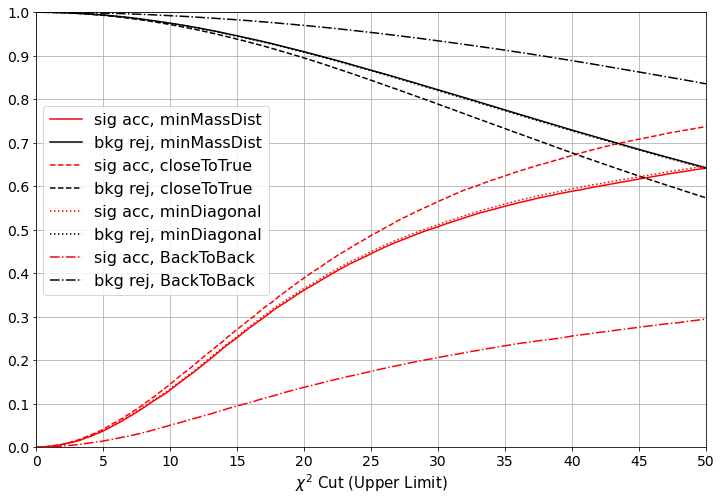

In [81]:
sty = {"minMassDist":"solid","closeToTrue":"dashed","minDiagonal":"dotted","BackToBack":"dashdot"}
plt.figure(figsize=(12,8))
for m in methods:
    sa = sig_acceptance_curves[m]
    ba = bkg_acceptance_curves[m]
    br = 1-np.array(ba)
    ls = sty[m]
    plt.plot(SR_thresholds,sa,color='red',linestyle=ls,label="sig acc, {0}".format(m))
    plt.plot(SR_thresholds,br,color='black',linestyle=ls,label="bkg rej, {0}".format(m))
#plt.yscale("log")
plt.xlim([0,50])
plt.ylim([0,1])
plt.legend(loc=(0.01,0.35),fontsize=16)
plt.xticks(ticks=np.arange(0,55,step=5),fontsize=14)
plt.yticks(ticks=np.arange(0,1.1,step=0.1),fontsize=14)
plt.grid()
plt.xlabel(r"$\chi^2$ Cut (Upper Limit)",fontsize=15)

Text(0, 0.5, 'S/B')

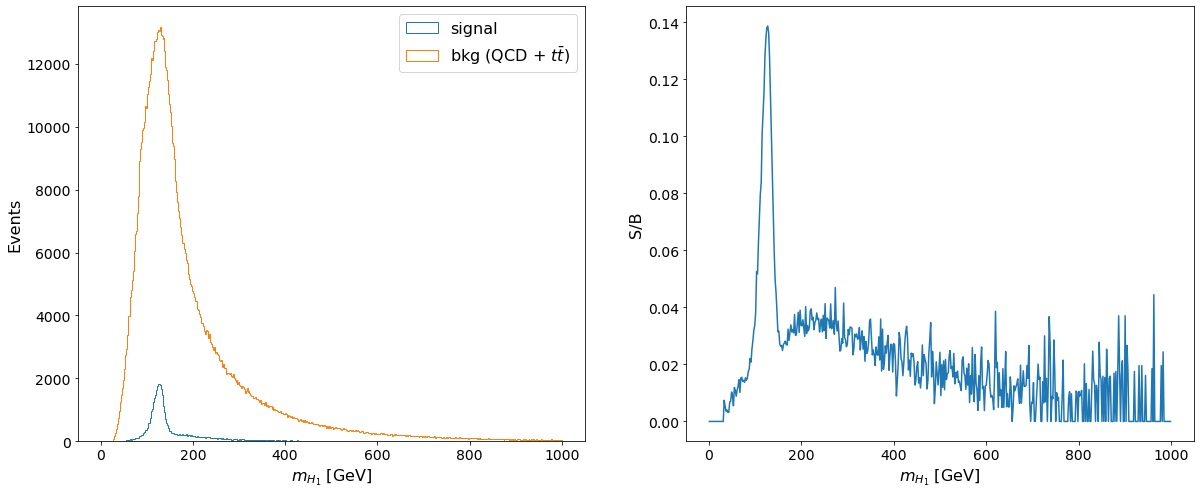

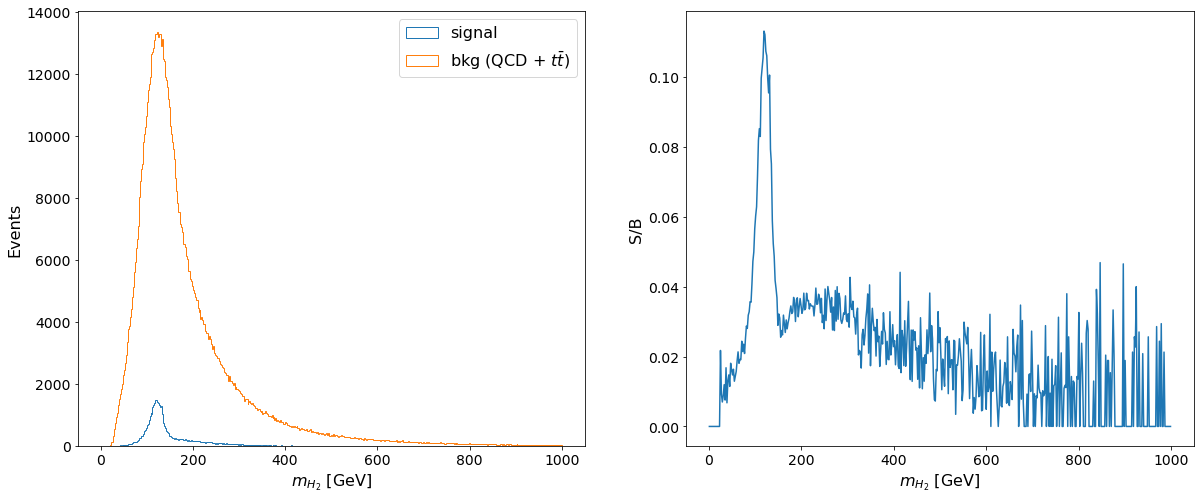

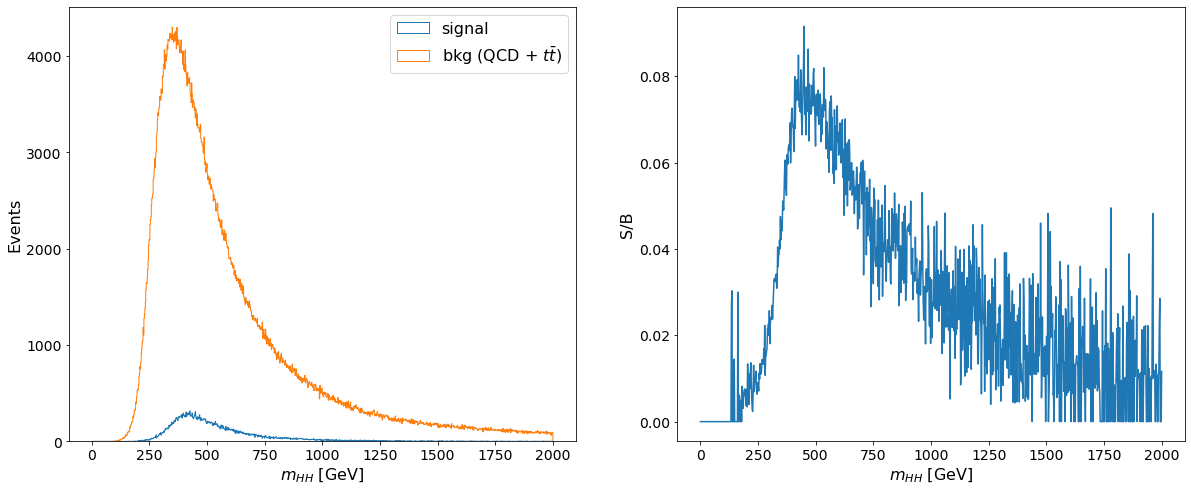

In [22]:
bins = np.linspace(0,1000,num=500)

plt.figure(1,(20,8))
plt.subplot(121)
hs = plt.hist(dfs_cut["H1_m"],label='signal',bins=bins,histtype='step',density=False)
hb = plt.hist(dfb_cut["H1_m"],label=r'bkg (QCD + $t\bar{t}$)',bins=bins,histtype='step',density=False)
plt.legend(loc='upper right',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$m_{H_1}$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.subplot(122)
plt.plot((bins[:-1]+bins[1:])/2,np.divide(hs[0],hb[0],out=np.zeros_like(hs[0]),where=hb[0]>0),label="S/B")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$m_{H_1}$ [GeV]",fontsize=16)
plt.ylabel("S/B",fontsize=16)

plt.figure(2,(20,8))
plt.subplot(121)
hs = plt.hist(dfs_cut["H2_m"],label='signal',bins=bins,histtype='step',density=False)
hb = plt.hist(dfb_cut["H2_m"],label=r'bkg (QCD + $t\bar{t}$)',bins=bins,histtype='step',density=False)
plt.legend(loc='upper right',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$m_{H_2}$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.subplot(122)
plt.plot((bins[:-1]+bins[1:])/2,np.divide(hs[0],hb[0],out=np.zeros_like(hs[0]),where=hb[0]>0),label="S/B")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$m_{H_2}$ [GeV]",fontsize=16)
plt.ylabel("S/B",fontsize=16)

bins = np.linspace(0,2000,num=1000)
plt.figure(3,(20,8))
plt.subplot(121)
hs = plt.hist(dfs_cut["HH_m"],label='signal',bins=bins,histtype='step',density=False)
hb = plt.hist(dfb_cut["HH_m"],label=r'bkg (QCD + $t\bar{t}$)',bins=bins,histtype='step',density=False)
plt.legend(loc='upper right',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$m_{HH}$ [GeV]",fontsize=16)
plt.ylabel("Events",fontsize=16)
plt.subplot(122)
plt.plot((bins[:-1]+bins[1:])/2,np.divide(hs[0],hb[0],out=np.zeros_like(hs[0]),where=hb[0]>0),label="S/B")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$m_{HH}$ [GeV]",fontsize=16)
plt.ylabel("S/B",fontsize=16)